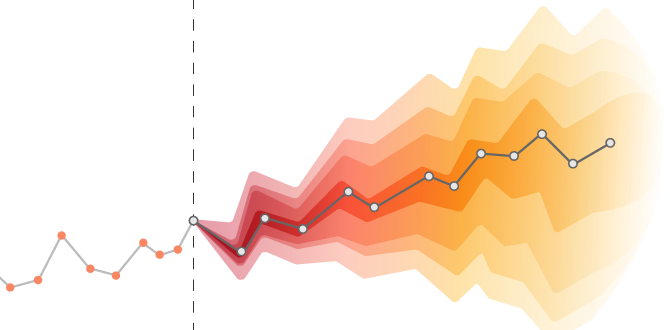

In [100]:
from IPython.display import Image
Image("C:/Users/sukhs/OneDrive/Desktop/abc.png")

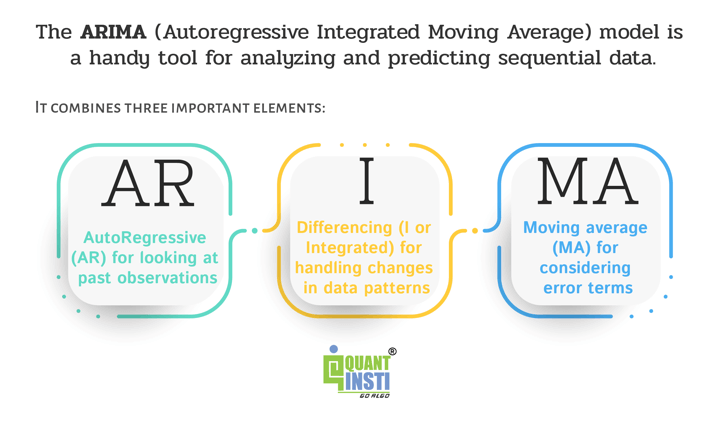

In [101]:
from IPython.display import Image
Image("C:/Users/sukhs/OneDrive/Desktop/Forecasting-Stock-Returns-Using-ARIMA-Model.png")

### 1. Importing the libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()
from time import time

### 2. Dataset Loading

In [103]:
#read data
df_ice_cream = pd.read_csv('ice_cream.csv')  
df_ice_cream

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636
...,...,...
572,2019-09-01,100.1741
573,2019-10-01,90.1684
574,2019-11-01,79.7223
575,2019-12-01,75.7094


### 3. Dataset Featuring

In [104]:
#rename columns to something more understandable
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

#convert date column to datetime type
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

#set date as index
df_ice_cream.set_index('date', inplace=True)

#just get data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

#df_ice_cream.index.freq = 'M' 

#show result
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


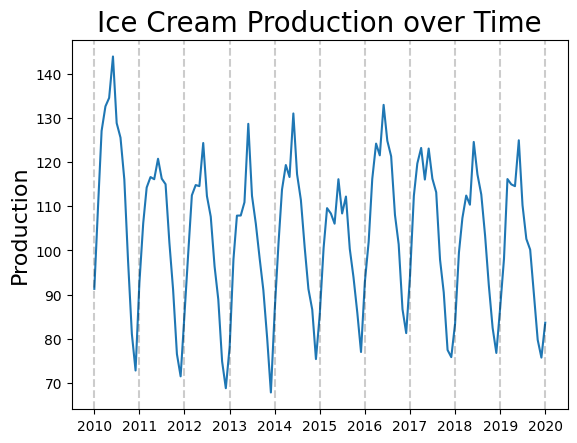

In [105]:
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2010,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

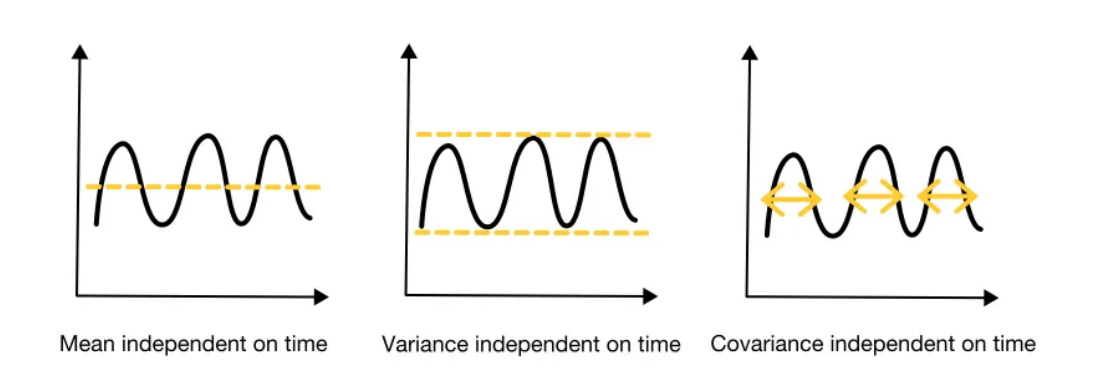

In [106]:
from IPython.display import Image
Image("C:/Users/sukhs/OneDrive/Desktop/xcsd.png")

### 4. 1 Mean

date
2011-09-01    0.523330
2011-10-01   -0.969900
2011-11-01   -2.529360
2011-12-01   -3.059365
2012-01-01   -2.457945
                ...   
2019-09-01    0.836990
2019-10-01   -0.466075
2019-11-01   -1.379645
2019-12-01   -1.836075
2020-01-01   -1.336270
Name: production, Length: 101, dtype: float64

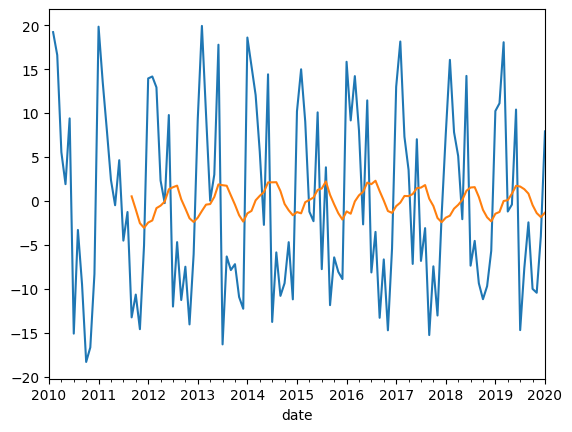

In [107]:
X1 = df_ice_cream['production']  - df_ice_cream['production'].shift(1)
X2 = X1.rolling(20).mean()
X2 = X2.dropna()
X1.plot()
X2.plot()
X1
X2

### VAr of the Data

date
2010-01-01     91.2895
2010-02-01    110.4994
2010-03-01    127.0971
2010-04-01    132.6468
2010-05-01    134.5576
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Name: production, Length: 121, dtype: float64

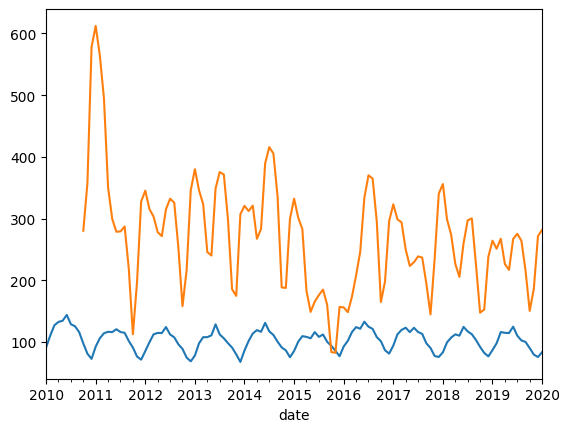

In [108]:
X1 = df_ice_cream['production'] # - df_ice_cream['production'].shift(1)
X2 = X1.rolling(10).var()
X2 = X2.dropna()
X1.plot()
X2.plot()
X1

Stationary data is expected to have constant mean and variance, various factors such as extreme events, seasonal variability, measurement errors, localized climate effects, and random fluctuations can contribute to higher variance in the dataset.

### ACF plot

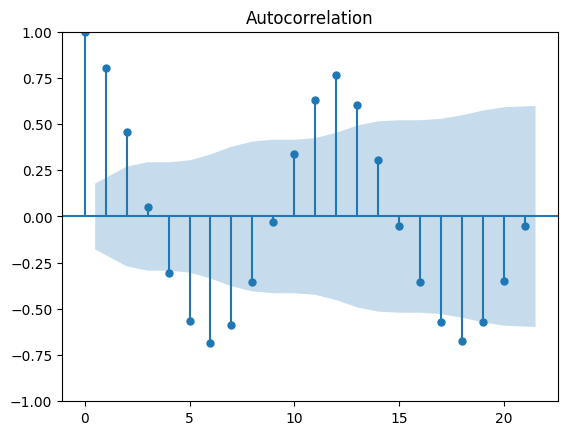

In [109]:
acf_plot = plot_acf(df_ice_cream.production)

By analyzing the ACF plot, you can gain insights into the order of the MA component in a time series model, which is crucial for selecting appropriate parameters when fitting the model.<br> Moving Average = [1, 6,12 ] <br> A cyclic ACF plot indicates the presence of seasonality in the time series data, highlighting the need to consider seasonal components when analyzing and modeling the data.

In [110]:
ma = [1,6, 12]

### PACF Plot

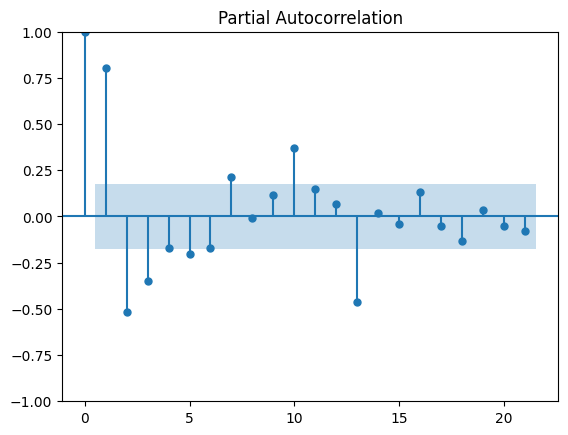

In [111]:
pacf_plot = plot_pacf(df_ice_cream.production) 

In [112]:
ar = [1, 2, 7, 10, 13]

By analyzing the PACF plot, you can gain insights into the order of the AR component in a time series model, which is crucial for selecting appropriate parameters when fitting the model.<br> Auto_regression = [1, 2, 7, 10, 13] <br>  Partial Autocorrelation Function (PACF) plot shows significant partial autocorrelation values at lags 1, 2, 3, 7, 10, and 13, it suggests that these lags may be relevant for determining the order of the Autoregressive (AR) component in a time series model. <br>

### 5. Training and Testing Data

In [113]:
train_end = datetime(2018,12,30)
test_end = datetime(2020,1,1)
train_data = df_ice_cream[:train_end]
test_data = df_ice_cream[train_end + timedelta(days=1):test_end]
train_data

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576
...,...
2018-08-01,112.6779
2018-09-01,103.3118
2018-10-01,92.1321


### 6. Model Building

In [114]:
import statsmodels.graphics.tsaplots as tsaplots
import warnings
warnings.filterwarnings("ignore", message="Non-stationary starting autoregressive parameters")
warnings.filterwarnings("ignore", message="Non-invertible starting MA parameters found.")

#Non-invertible starting MA parameters found.


# Iterate over hyperparameters
best_aic = np.inf
best_bic = np.inf
best_model_aic = None
best_model_bic = None
d_values = [0,1]
for p in ar:
    for d in d_values:
        for q in ma:
            # Fit ARIMA model
            model = ARIMA(train_data, order=(p, d, q))
            results = model.fit()
            # Print AIC for each model
            print(f"ARIMA({p},{d},{q}) - AIC: {results.aic}")
            # Update best model based on AIC
            if results.aic < best_aic:
                best_aic = results.aic
                aicscore.append(results.aic)
                best_model_aic = (p, d, q)

ARIMA(1,0,1) - AIC: 794.697988975571
ARIMA(1,0,6) - AIC: 754.0686444517875
ARIMA(1,0,12) - AIC: 718.9948818887977
ARIMA(1,1,1) - AIC: 793.4532597730529
ARIMA(1,1,6) - AIC: 761.7703775254788
ARIMA(1,1,12) - AIC: 713.4253306023096
ARIMA(2,0,1) - AIC: 752.2740709581667
ARIMA(2,0,6) - AIC: 715.7855154139438
ARIMA(2,0,12) - AIC: 717.9662482680882
ARIMA(2,1,1) - AIC: 793.7833237621802
ARIMA(2,1,6) - AIC: 751.1696330546961
ARIMA(2,1,12) - AIC: 715.5484661477096
ARIMA(7,0,1) - AIC: 742.2920380216101
ARIMA(7,0,6) - AIC: 704.3025330301562
ARIMA(7,0,12) - AIC: 679.1686093218761
ARIMA(7,1,1) - AIC: 735.2747401052859
ARIMA(7,1,6) - AIC: 703.1349366372592
ARIMA(7,1,12) - AIC: 682.4724844611812
ARIMA(10,0,1) - AIC: 695.5772587466896
ARIMA(10,0,6) - AIC: 653.7661750538387
ARIMA(10,0,12) - AIC: 677.3570726114699
ARIMA(10,1,1) - AIC: 688.1047231597497
ARIMA(10,1,6) - AIC: 647.0020039074931
ARIMA(10,1,12) - AIC: 666.66039642596
ARIMA(13,0,1) - AIC: 651.555700312373
ARIMA(13,0,6) - AIC: 654.1014752664815


### 6.1 Best AIC/BIC score

In [115]:
print(f"Best model based on AIC: ARIMA{best_model_aic} - AIC: {best_aic}")

Best model based on AIC: ARIMA(10, 1, 6) - AIC: 647.0020039074931


AIC and BIC are useful measures for model selection, but they have different approaches to balancing model fit and complexity. AIC tends to favor more complex models, while BIC tends to favor simpler models. 

### 6.3 Model Evaluation 

In [117]:
#create the model
model = ARIMA(train_data, order=(best_model_aic))
#fit the model
model_fit = model.fit()
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                  108
Model:                ARIMA(10, 1, 6)   Log Likelihood                -306.501
Date:                Sun, 12 May 2024   AIC                            647.002
Time:                        22:03:43   BIC                            692.440
Sample:                    01-01-2010   HQIC                           665.422
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3704      0.329     -1.127      0.260      -1.015       0.274
ar.L2          0.0206      0.052      0.399      0.690      -0.081       0.122
ar.L3         -0.9771      0.058    -16.888      0.0

### 7 Prediction

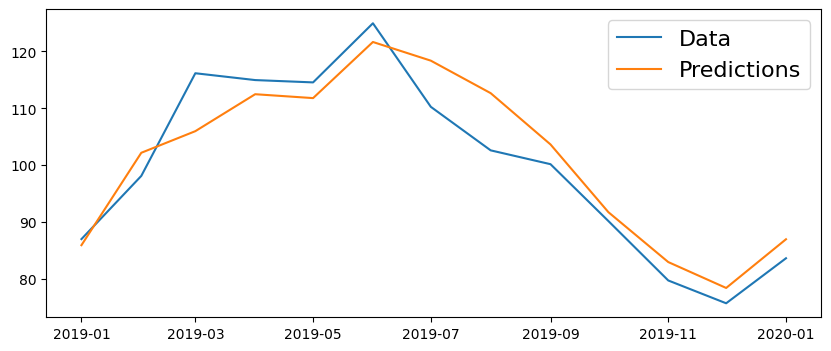

In [118]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

predictions = pd.DataFrame()

#get the predictions and residuals
predictions['Values'] = model_fit.predict(start=pred_start_date, end=pred_end_date)

plt.figure(figsize=(10,4))
plt.plot(test_data[-14:])
plt.plot(predictions.Values)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.show()

### 8. Residuals

In [119]:
residuals = []
C = 0
for i in (test_data.index):
    residual = test_data.production[i] - predictions.Values[i]
    residuals.append(residual) 


residuals = np.array(residuals)
residuals

array([  1.07204833,  -4.06921803,  10.18855553,   2.48737767,
         2.76239281,   3.29103038,  -8.12151104, -10.06058083,
        -3.47453369,  -1.56309288,  -3.23775489,  -2.69391726,
        -3.34203067])

In [120]:
### 9. Error Score

In [121]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residual/test_data)*100),2),"%")
print('Root Mean Squared Error:', np.sqrt(np.mean(residual**2)))

Mean Absolute Percent Error: 3.43 %
Root Mean Squared Error: 3.3420306721884288


<h3>Conclusion:</h3>
Based on the implementation of multiple ARIMA models and the final ARIMA(10, 1, 6) model, the following conclusions can be drawn:

1. **Model Selection Process**: The implementation of multiple ARIMA models involved exploring different combinations of hyperparameters (p, d, q) to identify the model with the best performance based on metrics such as AIC, BIC, Mean Absolute Percent Error (MAPE), and Root Mean Squared Error (RMSE).

2. **Hyperparameter Selection**: The final ARIMA(10, 1, 6) model was selected based on its performance metrics, indicating that it provided the best balance between model complexity and accuracy for the given time series data.

3. **Conclusion**: The final ARIMA(10, 1, 6) model appears to be a suitable choice for forecasting the given time series data, as it demonstrates relatively low error rates (MAPE and RMSE) and provides accurate predictions compared to the actual values.

Overall, the implementation of multiple ARIMA models followed by the selection of the final model based on performance metrics has resulted in a predictive model that can effectively forecast the time series data with a satisfactory level of accuracy.

In [ ]:
multiline_string = "This is a multiline\nstring in Python.\nIt spans multiple lines."
print(multiline_string)


In [2]:
## https://www.youtube.com/watch?v=Tg0vB5mXmt4 

## Video Link